In [1]:
import os
import pandas as pd
import numpy as np
from numpy import linalg as la
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import  matplotlib.pyplot  as  plt

path=r"C:\Users\User\OneDrive - aueb.gr\Επιφάνεια εργασίας\Msc\Numerical\proj2"
os.chdir(path) #insert path of the data.xslx

In [2]:
y_test = pd.read_excel('data.xlsx',header=None,sheet_name=0)
X_train = pd.read_excel('data.xlsx',header=None,sheet_name=1)
y_train = pd.read_excel('data.xlsx',header=None,sheet_name=2)
X_test = pd.read_excel('data.xlsx',header=None,sheet_name=3)

C:\Users\User\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
all_dfs = []
for i in range(10):
    indexes=np.where(y_train.values == i)[1]
    all_dfs.append(pd.DataFrame(X_train.iloc[:,indexes]))
    

Svd for each dataframe:

In [4]:
U=[]

for i in range(10):
    U.append(np.linalg.svd(all_dfs[i])[0])

In [5]:
I=np.identity(256)
f_test=y_test.values.reshape(2007)


In [6]:
def classify(k):
    U_=[]
    for i in range(10):
        U_.append(U[i][:,:k]) 
    all_residuals=[[] for i in range(X_test.shape[1])]
    for i in range(10): 
        for h in range(X_test.shape[1]):
            all_residuals[h].append(la.norm((I-(U_[i]@(U_[i].T)))@X_test.iloc[:,h]))
            
    minimum_digit=[]
    for residual in all_residuals:
            minimum_digit.append( min(range(10), key=residual.__getitem__) )
    minimum_digit=pd.DataFrame(minimum_digit)
    
    return accuracy_score(f_test,minimum_digit),classification_report(f_test,minimum_digit,output_dict=True),confusion_matrix(f_test, minimum_digit),minimum_digit   

Question 1+2

In [7]:
accs=[]
reports=[]
conf_matrices=[]
y_preds=[]

for k in range(5,21):
    temp=classify(k)
    accs.append(temp[0])
    reports.append(temp[1])
    conf_matrices.append(temp[2])
    y_preds.append(temp[3])

In [8]:
results= pd.DataFrame(list(zip(accs, range(5,21))),
               columns =['Accuracy', 'Basis number'])

In [32]:
results


,Accuracy,Basis number
0,0.902840,5
1,0.905331,6
2,0.916791,7
3,0.920279,8
4,0.926258,9
5,0.931739,10
6,0.932237,11
7,0.935725,12
8,0.936223,13
9,0.939213,14


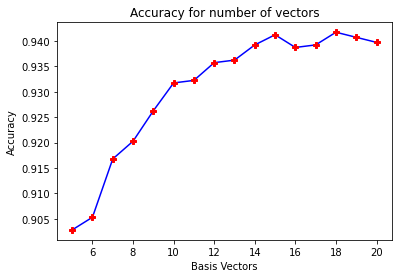

In [10]:
signs=range(5,21)
plt.plot(signs,accs,color='b')
plt.plot(signs,accs,'P',color='r')
plt.xlabel('Basis Vectors')
plt.ylabel('Accuracy')
plt.title('Accuracy for number of vectors')
plt.show()

As we see from the plot above , for basis=18 vectors we have the best accuracy!

So for 18 vectors we have the following report: 


In [12]:
pd.DataFrame(reports[13]).transpose()

,precision,recall,f1-score,support
0,0.939153,0.988858,0.963365,359.000000
1,0.973684,0.981061,0.977358,264.000000
2,0.956989,0.898990,0.927083,198.000000
3,0.914634,0.903614,0.909091,166.000000
4,0.906863,0.925000,0.915842,200.000000
5,0.933775,0.881250,0.906752,160.000000
6,0.987879,0.958824,0.973134,170.000000
7,0.946309,0.959184,0.952703,147.000000
8,0.938650,0.921687,0.930091,166.000000
9,0.911602,0.932203,0.921788,177.000000


Best f1 score on 0,1,6,7 digits and worst f1 score on 3,5 digits

It can also be noticed from the confusion matrix.

In [13]:
conf_matrices[13]

array([[355,   0,   2,   0,   1,   0,   0,   0,   0,   1],
       [  0, 259,   0,   0,   3,   0,   2,   0,   0,   0],
       [  8,   1, 178,   2,   5,   0,   0,   1,   3,   0],
       [  2,   0,   3, 150,   1,   6,   0,   1,   2,   1],
       [  2,   1,   0,   0, 185,   2,   0,   3,   0,   7],
       [  7,   1,   1,   5,   0, 141,   0,   0,   2,   3],
       [  2,   1,   0,   0,   2,   1, 163,   0,   1,   0],
       [  0,   1,   1,   0,   3,   0,   0, 141,   0,   1],
       [  2,   0,   1,   6,   0,   1,   0,   0, 153,   3],
       [  0,   2,   0,   1,   4,   0,   0,   3,   2, 165]], dtype=int64)

Now lets compute the missclassified,so we can observe how they look like: Well written or bad written.

In [15]:
indexes_falseDigits=np.where(f_test != y_preds[13].values.T)[1]

In [16]:
print(indexes_falseDigits.shape[0] , 'digits are misclassified')

117 digits are misclassified


In [17]:
wrong_vectors=X_test[indexes_falseDigits]

In [20]:
wrong_vectors.shape

(256, 117)

<ipython-input-21-402159e7f636>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax=plt.subplots()


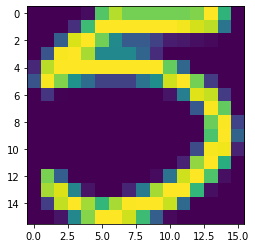

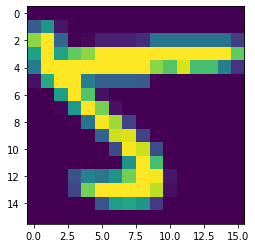

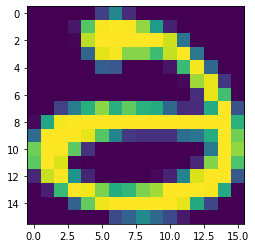

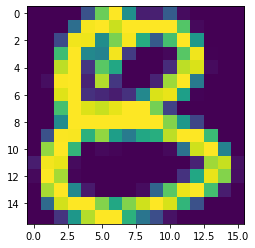

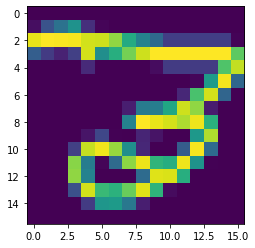

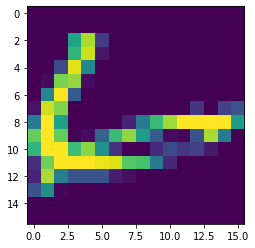

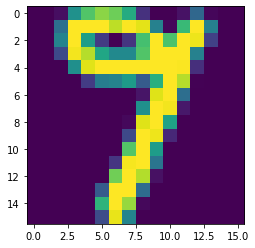

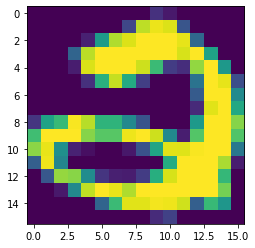

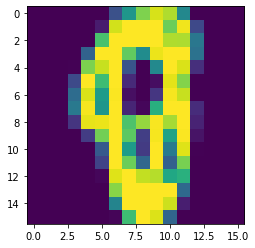

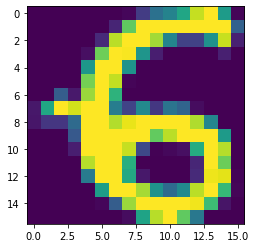

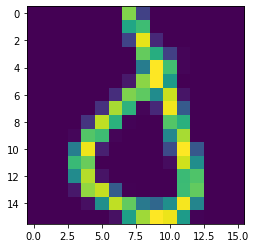

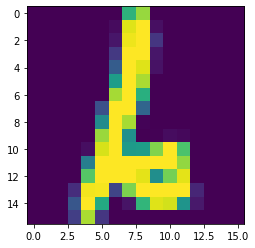

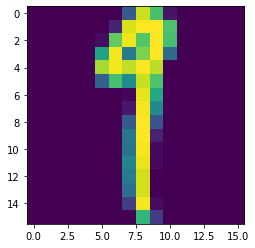

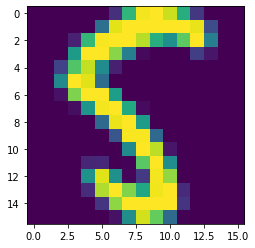

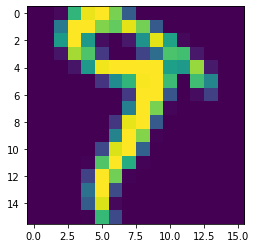

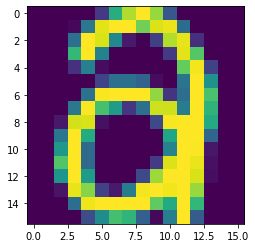

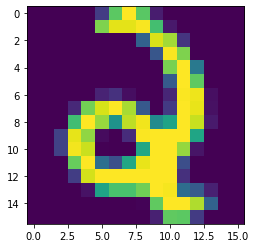

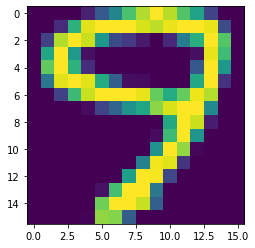

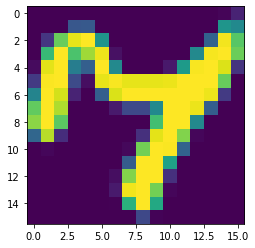

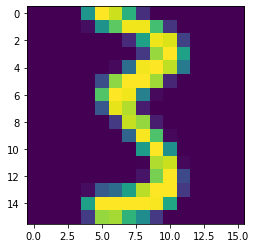

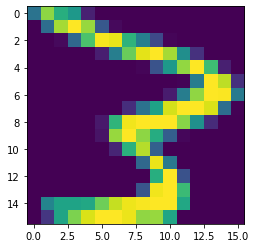

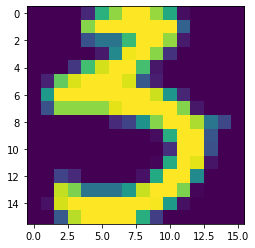

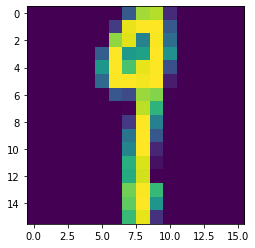

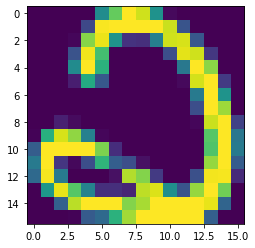

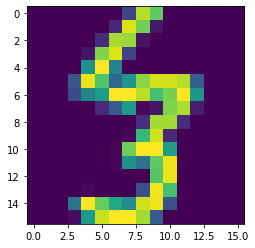

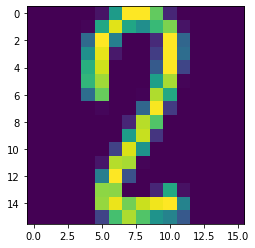

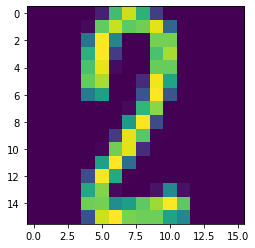

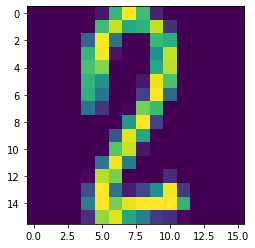

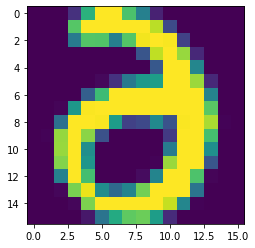

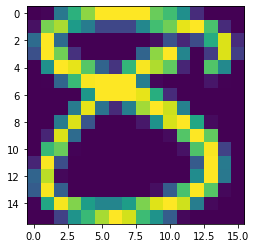

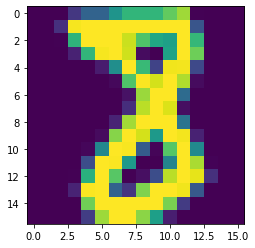

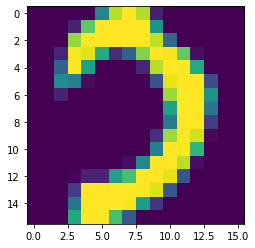

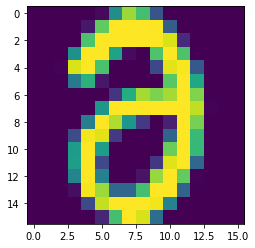

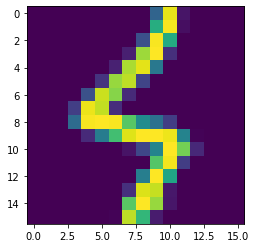

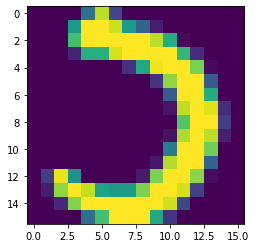

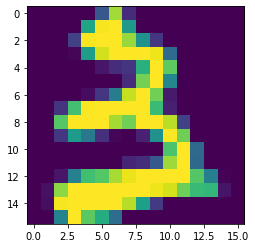

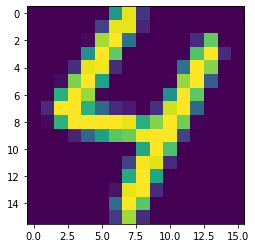

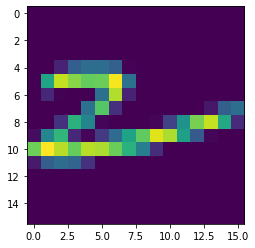

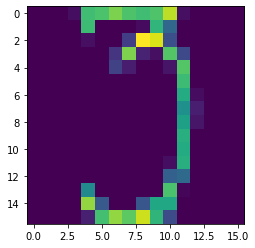

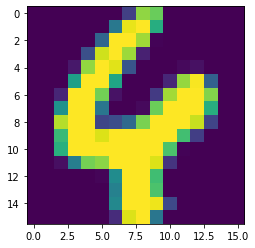

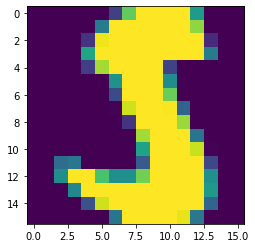

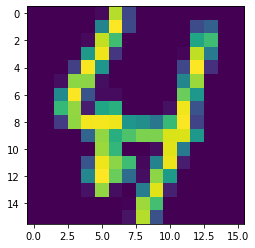

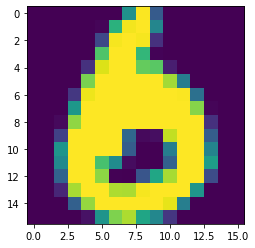

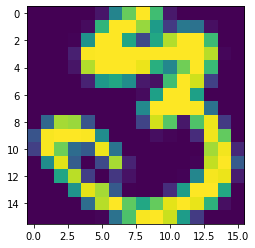

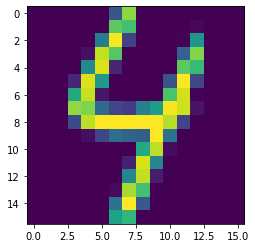

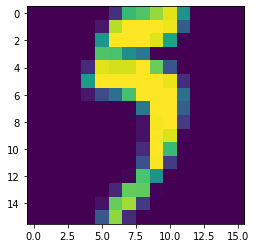

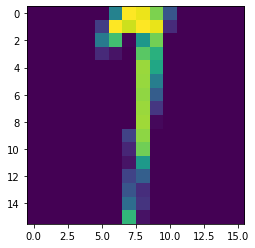

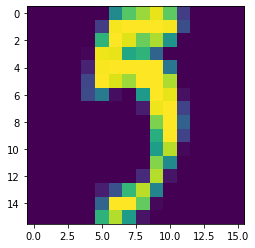

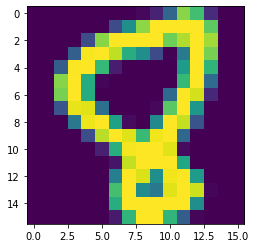

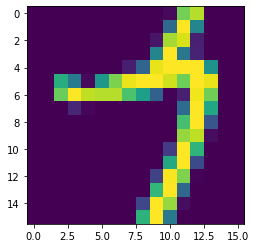

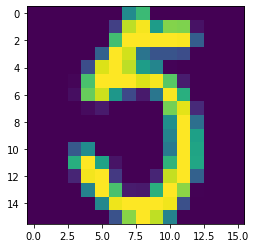

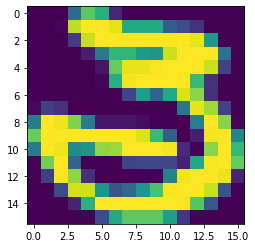

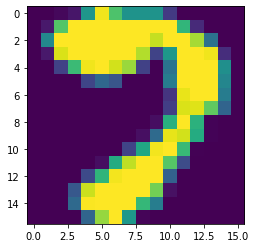

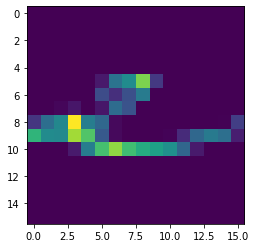

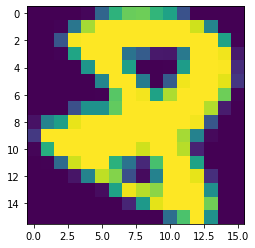

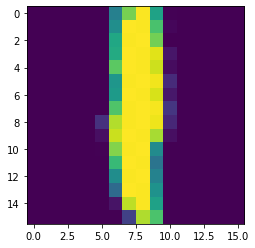

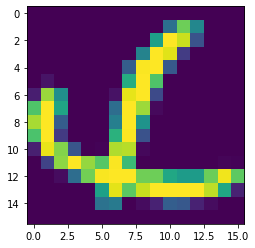

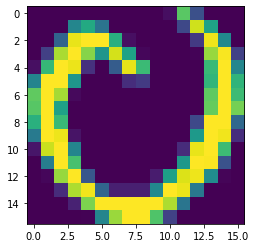

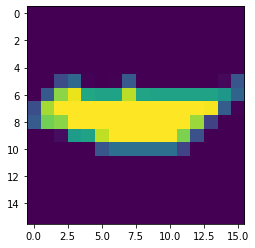

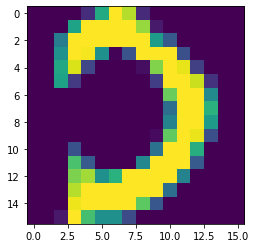

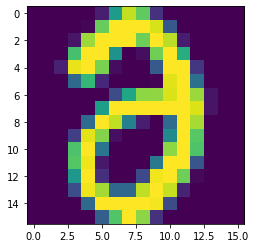

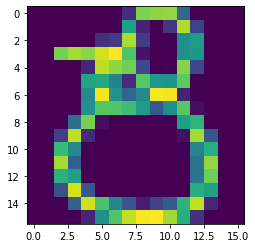

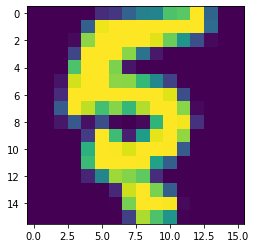

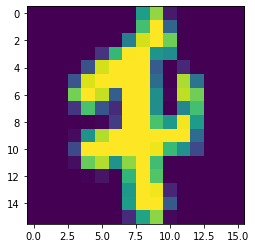

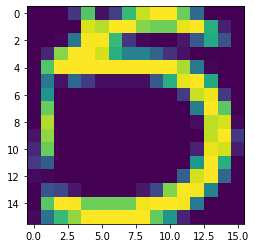

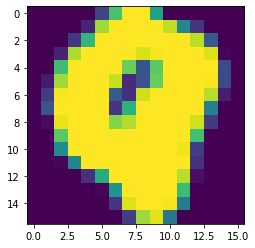

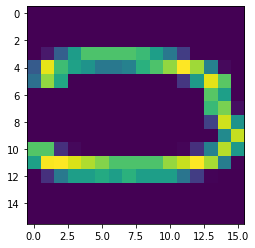

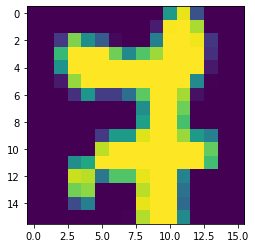

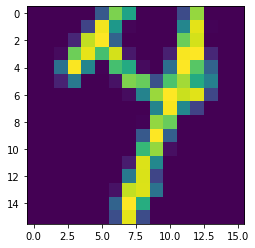

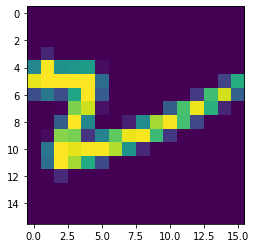

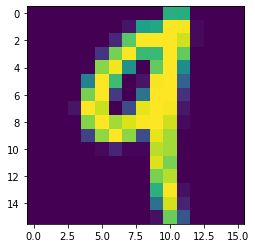

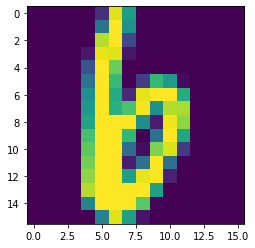

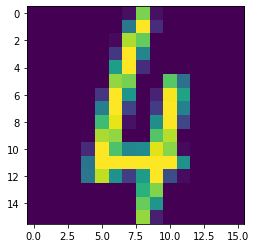

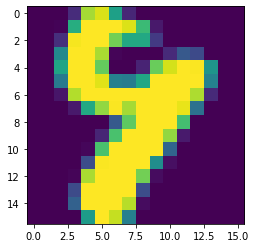

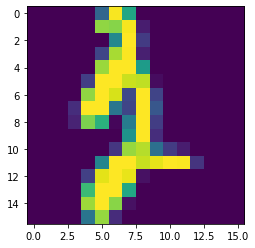

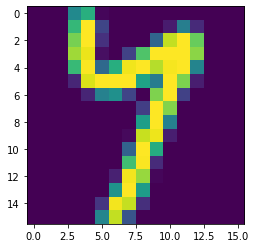

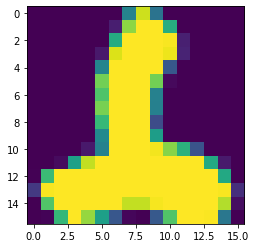

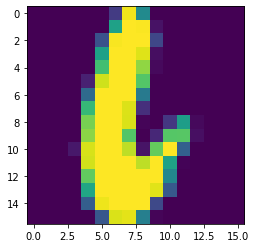

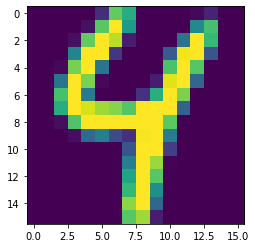

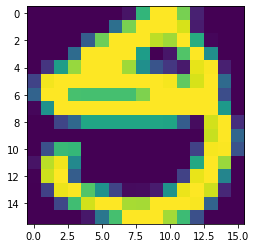

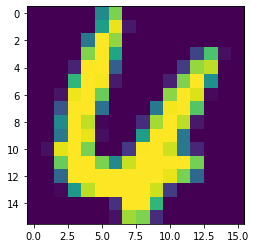

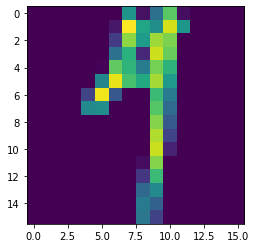

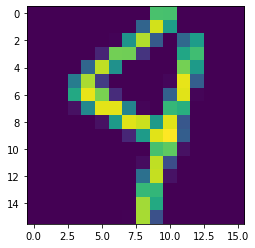

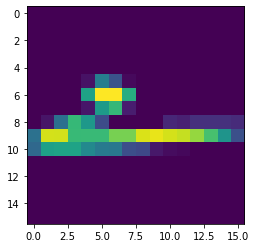

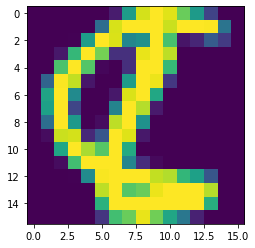

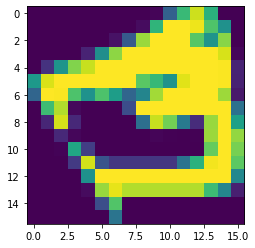

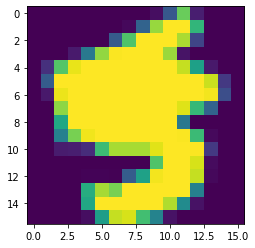

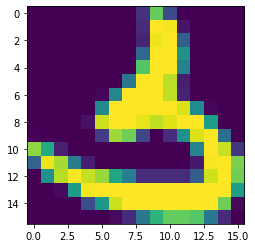

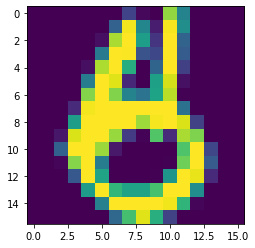

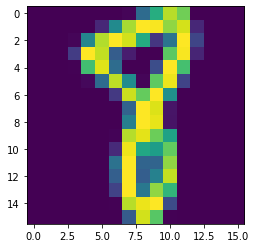

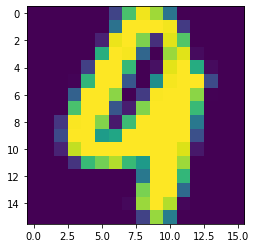

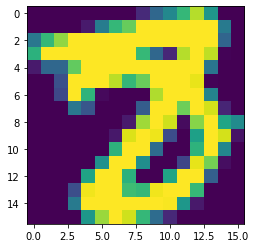

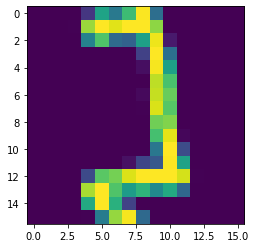

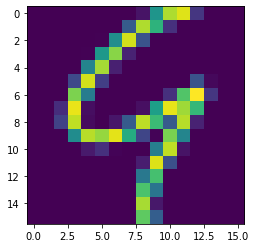

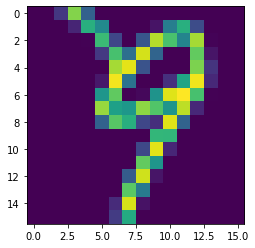

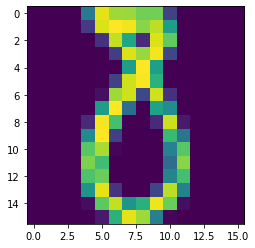

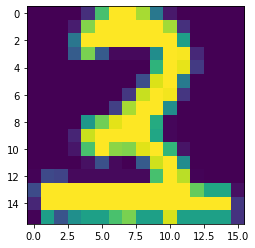

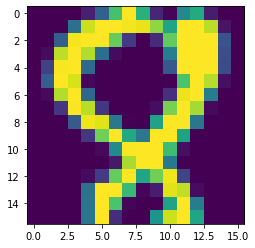

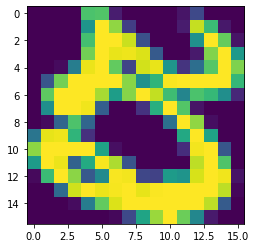

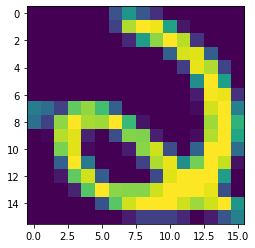

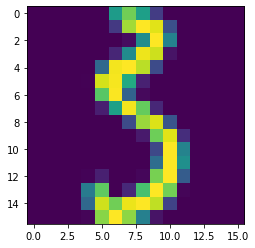

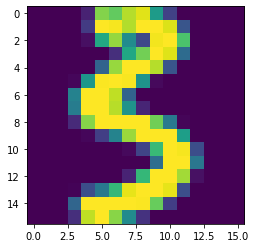

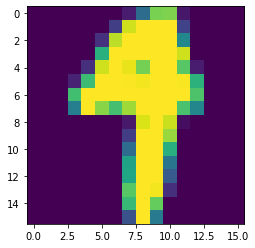

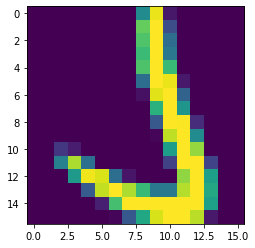

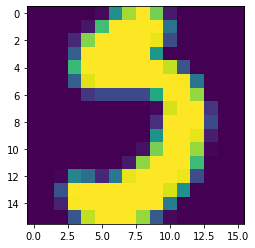

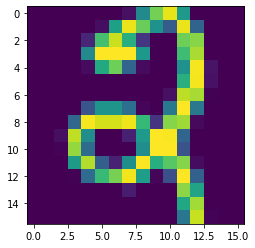

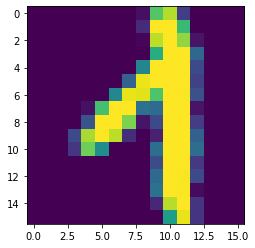

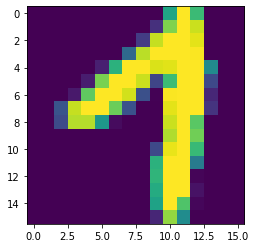

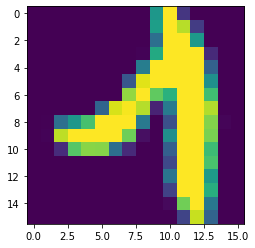

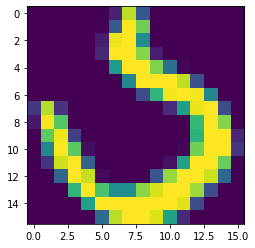

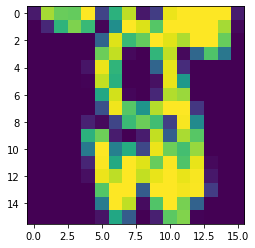

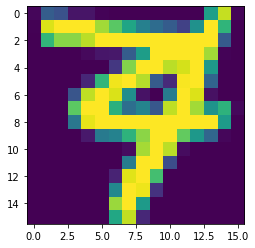

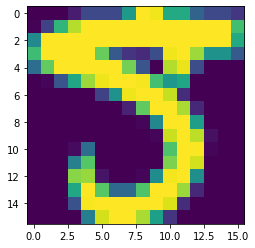

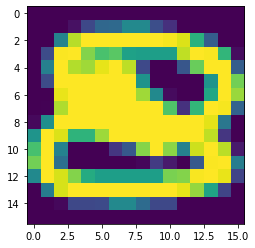

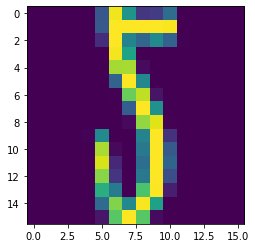

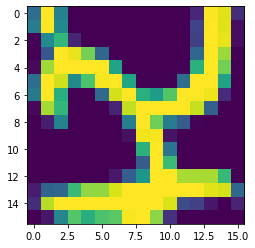

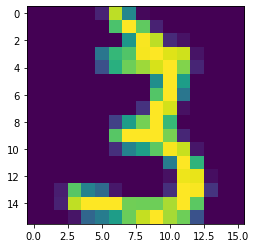

In [21]:
for i in range(wrong_vectors.shape[1]): 
    fig,ax=plt.subplots()
    ax.imshow(np.array(wrong_vectors.iloc[:,i]).reshape(16,16))

As we see the images are , very bad written and they can be easily missclassified!!!

Question 3) 
As in many tests and trials done, i conclude to the below:

For digit '3' it is better to use 18 base vectors instead of 20
For digit '4' it is better to use 14 base vectors instead of 20 ...etc.

In [22]:
print('Digit 4 for every number of base vectors: \n')
for i in range(16):  
    print(reports[i]['4']['f1-score'],i+5)

Digit 4 for every number of base vectors: 

0.8520408163265306 5
0.8688946015424165 6
0.8797953964194374 7
0.9063291139240507 8
0.9145728643216081 9
0.9265822784810127 10
0.9154228855721394 11
0.916256157635468 12
0.916256157635468 13
0.9280397022332506 14
0.9276807980049875 15
0.9185185185185186 16
0.9158415841584158 17
0.9158415841584158 18
0.9207920792079208 19
0.9257425742574258 20


In [23]:
print('Digit 3 for every number of base vectors: \n')

for i in range(16):
    print(reports[i]['3']['f1-score'],i+5)

Digit 3 for every number of base vectors: 

0.8597014925373134 5
0.8588588588588588 6
0.8674698795180723 7
0.880952380952381 8
0.8802395209580839 9
0.8742514970059881 10
0.8787878787878789 11
0.8802395209580839 12
0.8882175226586103 13
0.8948948948948949 14
0.896969696969697 15
0.8929663608562691 16
0.9024390243902438 17
0.9090909090909091 18
0.8990825688073394 19
0.9051987767584098 20


Also total accuracy and f1 score for each digit: drops in many cases that the number of base vectors increases

Now changing only class 9 and class 10 by reducing their basic vectors ,we have the following:

In [34]:
def digit_classify(k):
    U_=[]
    for i in range(8):
        U_.append(U[i][:,:k])
    U_.append(U[8][:,:k-3])
    U_.append(U[9][:,:k-4])
        
    all_residuals=[[] for i in range(X_test.shape[1])]
    for i in range(10): 
        for h in range(X_test.shape[1]):
            all_residuals[h].append(la.norm((I-(U_[i]@(U_[i].T)))@X_test.iloc[:,h]))
            
    minimum_digit=[]
    for residual in all_residuals:
            minimum_digit.append( min(range(10), key=residual.__getitem__) )
    minimum_digit=pd.DataFrame(minimum_digit)
    
    return accuracy_score(f_test,minimum_digit),classification_report(f_test,minimum_digit,output_dict=True),confusion_matrix(f_test, minimum_digit),minimum_digit   

In [35]:
accs2=[]
reports2=[]
conf_matrices2=[]
y_preds2=[]

for k in range(5,21):
    temp2=digit_classify(k)
    accs2.append(temp2[0])
    reports2.append(temp2[1])
    conf_matrices2.append(temp2[2])
    y_preds2.append(temp2[3])

In [36]:
results2= pd.DataFrame(list(zip(accs2, range(5,21))),
               columns =['Accuracy', 'Basis number'])

In the dataframe below we see that the total accuracy for vectors over 10 basic vectors is almost the same.

In [39]:
results2

,Accuracy,Basis number
0,0.858994,5
1,0.880419,6
2,0.890882,7
3,0.907324,8
4,0.914300,9
5,0.915296,10
6,0.921774,11
7,0.926756,12
8,0.928251,13
9,0.933234,14


In [41]:
results

,Accuracy,Basis number
0,0.902840,5
1,0.905331,6
2,0.916791,7
3,0.920279,8
4,0.926258,9
5,0.931739,10
6,0.932237,11
7,0.935725,12
8,0.936223,13
9,0.939213,14


The f1-score is also almost the same as before:

In [42]:
pd.DataFrame(reports2[13]).transpose()

,precision,recall,f1-score,support
0,0.936675,0.988858,0.962060,359.000000
1,0.959259,0.981061,0.970037,264.000000
2,0.952128,0.904040,0.927461,198.000000
3,0.909091,0.903614,0.906344,166.000000
4,0.901408,0.960000,0.929782,200.000000
5,0.922581,0.893750,0.907937,160.000000
6,0.982036,0.964706,0.973294,170.000000
7,0.898089,0.959184,0.927632,147.000000
8,0.973333,0.879518,0.924051,166.000000
9,0.975460,0.898305,0.935294,177.000000


In [43]:
pd.DataFrame(reports[13]).transpose()

,precision,recall,f1-score,support
0,0.939153,0.988858,0.963365,359.000000
1,0.973684,0.981061,0.977358,264.000000
2,0.956989,0.898990,0.927083,198.000000
3,0.914634,0.903614,0.909091,166.000000
4,0.906863,0.925000,0.915842,200.000000
5,0.933775,0.881250,0.906752,160.000000
6,0.987879,0.958824,0.973134,170.000000
7,0.946309,0.959184,0.952703,147.000000
8,0.938650,0.921687,0.930091,166.000000
9,0.911602,0.932203,0.921788,177.000000


Now reducing only classes 3,5 which are our worst classes:

In [50]:
def digit_classify2(k):
    U_=[]
    U_.append(U[0][:,:k])
    U_.append(U[1][:,:k])
    U_.append(U[2][:,:k])
    U_.append(U[3][:,:k-3])
    U_.append(U[4][:,:k])
    U_.append(U[5][:,:k-4])
    for i in range(6,10):
        U_.append(U[i][:,:k])

        
    all_residuals=[[] for i in range(X_test.shape[1])]
    for i in range(10): 
        for h in range(X_test.shape[1]):
            all_residuals[h].append(la.norm((I-(U_[i]@(U_[i].T)))@X_test.iloc[:,h]))
            
    minimum_digit=[]
    for residual in all_residuals:
            minimum_digit.append( min(range(10), key=residual.__getitem__) )
    minimum_digit=pd.DataFrame(minimum_digit)
    
    return accuracy_score(f_test,minimum_digit),classification_report(f_test,minimum_digit,output_dict=True),confusion_matrix(f_test, minimum_digit),minimum_digit   

In [51]:
accs3=[]
reports3=[]
conf_matrices3=[]
y_preds3=[]

for k in range(5,21):
    temp3=digit_classify2(k)
    accs3.append(temp3[0])
    reports3.append(temp3[1])
    conf_matrices3.append(temp3[2])
    y_preds3.append(temp3[3])

In [52]:
results3= pd.DataFrame(list(zip(accs3, range(5,21))),
               columns =['Accuracy', 'Basis number'])

As we observe below ,accuracy is slightly better for basis vectors  >15

In [56]:
results

,Accuracy,Basis number
0,0.902840,5
1,0.905331,6
2,0.916791,7
3,0.920279,8
4,0.926258,9
5,0.931739,10
6,0.932237,11
7,0.935725,12
8,0.936223,13
9,0.939213,14


In [53]:
results3

,Accuracy,Basis number
0,0.860987,5
1,0.876931,6
2,0.895366,7
3,0.898356,8
4,0.905331,9
5,0.917788,10
6,0.920777,11
7,0.927753,12
8,0.926756,13
9,0.931241,14


In [54]:
pd.DataFrame(reports3[13]).transpose()

,precision,recall,f1-score,support
0,0.929319,0.988858,0.958165,359.00000
1,0.973684,0.981061,0.977358,264.00000
2,0.937173,0.904040,0.920308,198.00000
3,0.935065,0.867470,0.900000,166.00000
4,0.906863,0.925000,0.915842,200.00000
5,0.950000,0.831250,0.886667,160.00000
6,0.982036,0.964706,0.973294,170.00000
7,0.927632,0.959184,0.943144,147.00000
8,0.923077,0.939759,0.931343,166.00000
9,0.906593,0.932203,0.919220,177.00000


In [55]:
pd.DataFrame(reports[13]).transpose()

,precision,recall,f1-score,support
0,0.939153,0.988858,0.963365,359.000000
1,0.973684,0.981061,0.977358,264.000000
2,0.956989,0.898990,0.927083,198.000000
3,0.914634,0.903614,0.909091,166.000000
4,0.906863,0.925000,0.915842,200.000000
5,0.933775,0.881250,0.906752,160.000000
6,0.987879,0.958824,0.973134,170.000000
7,0.946309,0.959184,0.952703,147.000000
8,0.938650,0.921687,0.930091,166.000000
9,0.911602,0.932203,0.921788,177.000000
